
<h1>Задание 1</h1>

есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   
Необходимо прочитать его и представить в виде df 

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

<h1>Задание 2.1</h1>

На основании данных из задания 1 необходимо составить максимальное(миним 5) кол-во гипотез о корреляциях между отдельными столбцами и проверить их (аналогично воршопу). При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покапают в основном осенью")

### Составленные гипотезы:
1) Женщины старше 40 лет покупают в основном осенью
2) Женщины в среднем покупают более дорогие товары, чем мужчины
3) Яркая одежда в основном покупается летом
4) Использование промокода дает применение скидки
5) Частота покупок корреллирует с количетсвом покупок до этого

<Axes: xlabel='Season', ylabel='Count'>

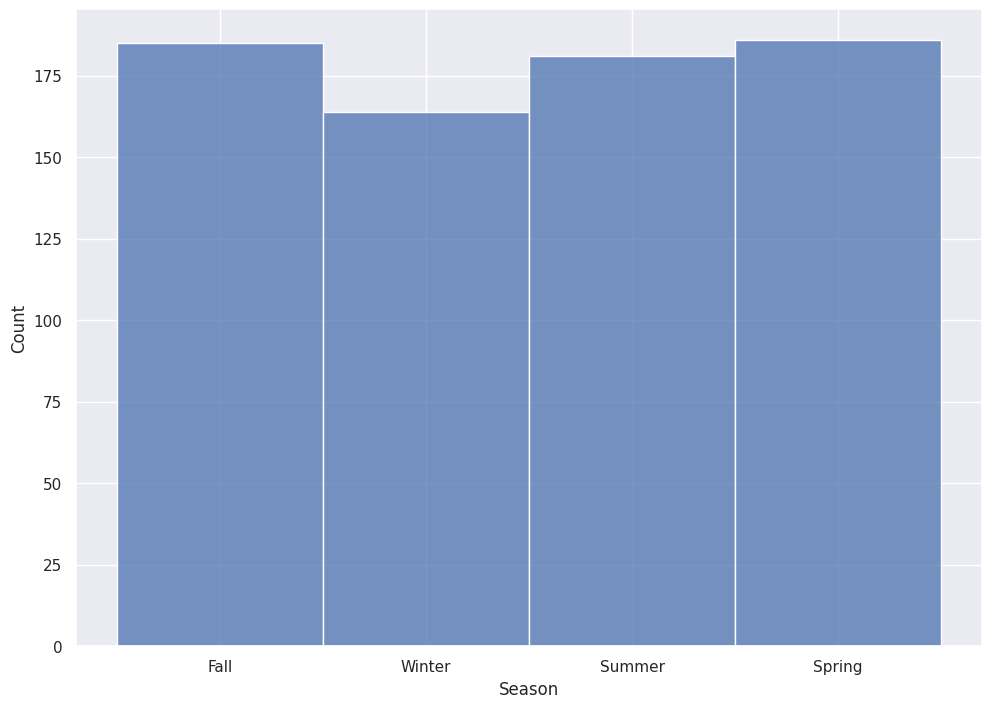

In [184]:
# 1) Женщины старше 40 лет покупают в основном осенью
# Отбрем женщин страшре 40 лет вместе с сезоном, когда они купили одежду
# и построим гистограмму покупок по сезону
df1 = df.loc[((df['Age'] > 40) & (df['Gender'] == 'Female'))]
sns.histplot(df1['Season'], bins=4)

Видно, что распредление примерно равномерное, это отпровергает гипотезу.

In [130]:
# 2) Женщины в среднем покупают более дорогие товары, чем мужчины
# Для проверки гипотезы рассчитаем среднее Purchase Amount для мужчин и для женщин
mean_amount_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean()
print(mean_amount_by_gender)

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


Видно, что средние примерно равны, поэтому гипотеза неверная.

In [292]:
#  3) Яркая одежда покупается летом
print(df["Color"].unique())
print(np.unique(df["Season"], return_counts=1))

['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', ..., 'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue']
Length: 25
Categories (25, object): ['Black', 'Brown', 'Gray', 'Blue', ..., 'Orange', 'Yellow', 'Pink', 'White']
(array(['Fall', 'Spring', 'Summer', 'Winter'], dtype=object), array([975, 999, 955, 971]))


In [132]:
br_colour_dict = {
    'Magenta':1,
    'Cyan':1,
    'Gold':1,
    'Purple':1,
    'Green':1,
    'Turquoise':1,
    'Silver':1,
    'Peach':1,
    'Yellow':1,
    'Pink':1,
    'White':1,
    'Lavender':1,
    'Violet':1,
    'Beige':0,
    'Charcoal':0,
    'Black':0,
    'Maroon':0,
    'Gray':0,
    'Brown':0,
    'Teal':0,
    'Indigo':0,
    'Red':0,
    'Blue':0,
    'Orange':0,
    'Olive':0
}
season_dict = {
    'Winter': 0,
    'Fall': 0,
    'Spring': 0,
    'Summer': 1,
}
temp_df = df.loc[:, ['Season', 'Color']]
temp_df['Season'] = temp_df['Season'].replace(season_dict)
temp_df['Color'] = temp_df['Color'].replace(br_colour_dict)
print(np.unique(temp_df['Season'], return_counts=1))
print(np.unique(temp_df['Color'], return_counts=1))
temp_df.corr()

(array([0, 1]), array([2945,  955]))
(array([0, 1]), array([1875, 2025]))


,Season,Color
Season,1.000000,0.001354
Color,0.001354,1.000000


Корреляции нет

In [34]:
#  4) Использование промокода дает применение скидки
df["Discount Applied"] = df["Discount Applied"].replace({'Yes':1, 'No':0})
df["Promo Code Used"] = df["Promo Code Used"].replace({'Yes':1, 'No':0})
df.loc[:, ["Discount Applied", "Promo Code Used"]].corr()

,Discount Applied,Promo Code Used
Discount Applied,1.0,1.0
Promo Code Used,1.0,1.0


Корреляция идеальная. Значит использование промокода всегда дает скидку.

In [20]:
# 5) Частота покупок корреллирует с количетсвом покупок до этого
# Рассмотрим, какие категории частоты покупок вообще бывают
df["Frequency of Purchases"].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [127]:
# Превратим слова в числа - частота покукпи в неделю
frequency_dict = {
    'Fortnightly': 1/2,
    'Weekly': 1,
    'Annually': 1/12/4.2,
    'Quarterly': 1/12/4.2*4,
    'Bi-Weekly':1/2,
    'Monthly': 1/4.2,
    'Every 3 Months': 1/4.2/3
}
df["Frequency of Purchases"] = df["Frequency of Purchases"].replace(frequency_dict)
df.loc[:, ["Previous Purchases", "Frequency of Purchases"]].corr()

,Previous Purchases,Frequency of Purchases
Previous Purchases,1.000000,0.004465
Frequency of Purchases,0.004465,1.000000


Видим, что гипотеза не подтвердилась, корреляции почти нет.

<h1>Задание 2.2</h1>

Помимо гипотез, давайте найдем самый популярный товар, построим распределение покупателей по полу, определим какой пол(и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары. Определим есть ли зависимость между цветом одежды и сезоном. Так же посчитаем наш сезонный mau (уникальных пользователей за сезон) и его динамику. Так же давайте найдем самую популярную букву в названии одежды. 

In [106]:
# Самый популярный товар
df['Item Purchased'].value_counts().idxmax()

'Blouse'

<Axes: xlabel='Gender', ylabel='Count'>

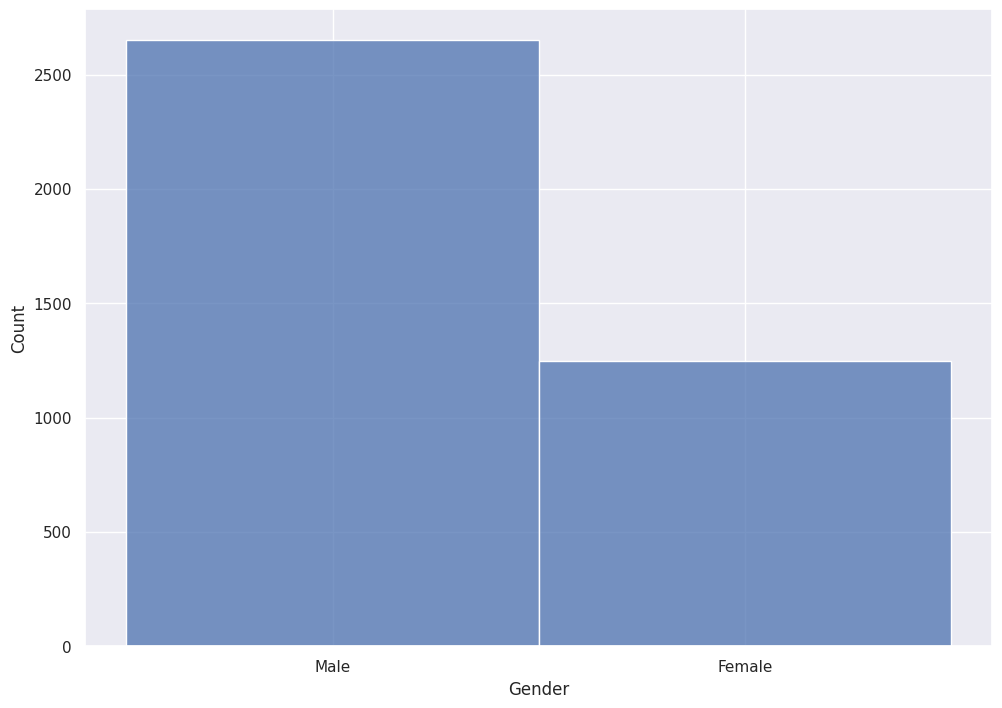

In [183]:
# Распределение покупателей по полу
sns.histplot(df['Gender'], bins=2)

Most popular age: 69


<Axes: xlabel='Age', ylabel='Count'>

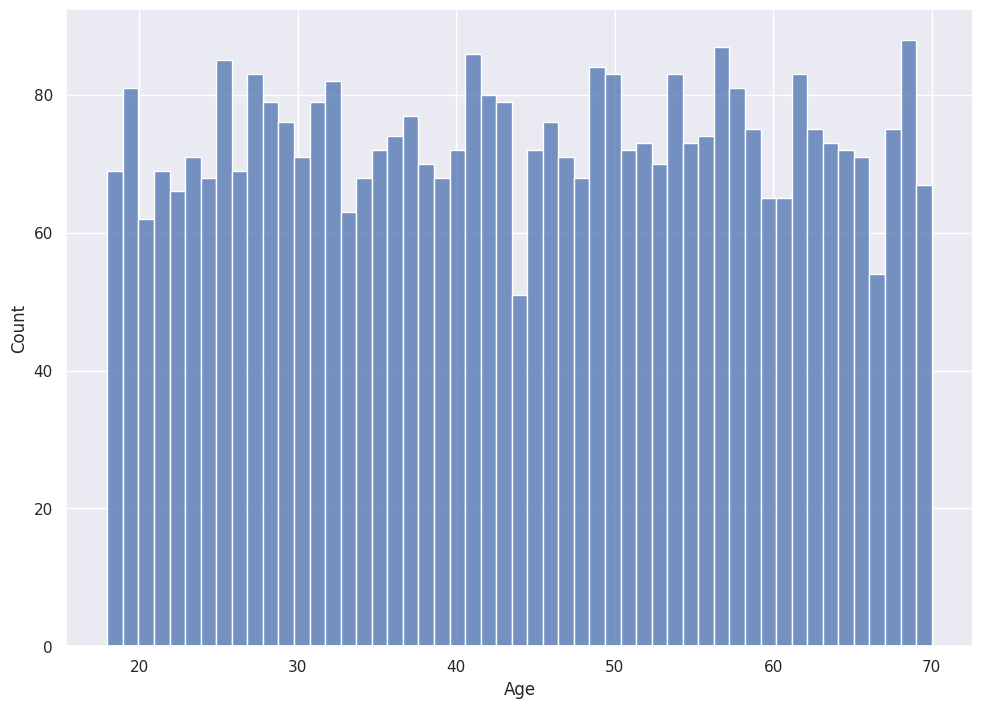

In [182]:
# Распределение покупателей по возрасту, самый "покупательный" возраст
print(f"Most popular age: {df['Age'].value_counts().idxmax()}")
sns.histplot(df['Age'], bins=df['Age'].max() - df['Age'].min() + 1)

In [154]:
sorted_frqs = np.array(['Weekly',  'Fortnightly', 'Bi-Weekly', 'Monthly', 'Every 3 Months', 'Quarterly', 'Annually'])
df['Frequency of Purchases'] = pd.Categorical(df['Frequency of Purchases'], sorted_frqs)

<Axes: xlabel='Frequency of Purchases', ylabel='Density'>

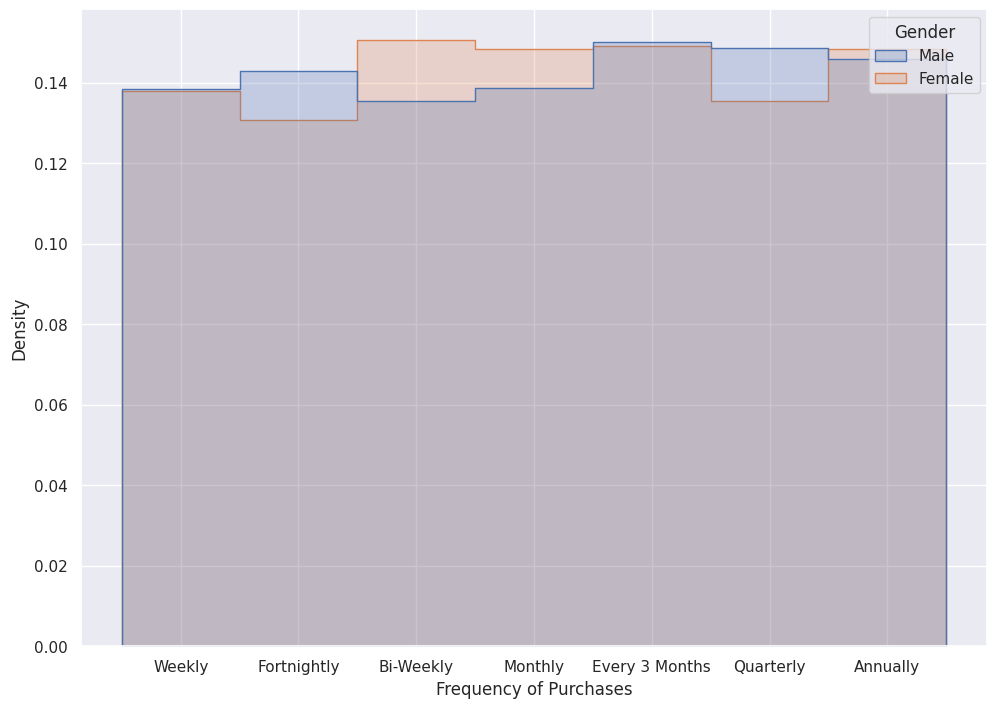

In [181]:
# Какой возраст покупает чаще всего 
# Для этого построим гистограмму для столбца Frequency of Purchases для мужчин и женщин, нормализуя их по всей выборке
sns.histplot(df, x="Frequency of Purchases", hue="Gender", element="step",
    stat="density", common_norm=False)

Видно, что чаще всего покупают мужчины.

<Axes: xlabel='Purchase Amount (USD)', ylabel='Density'>

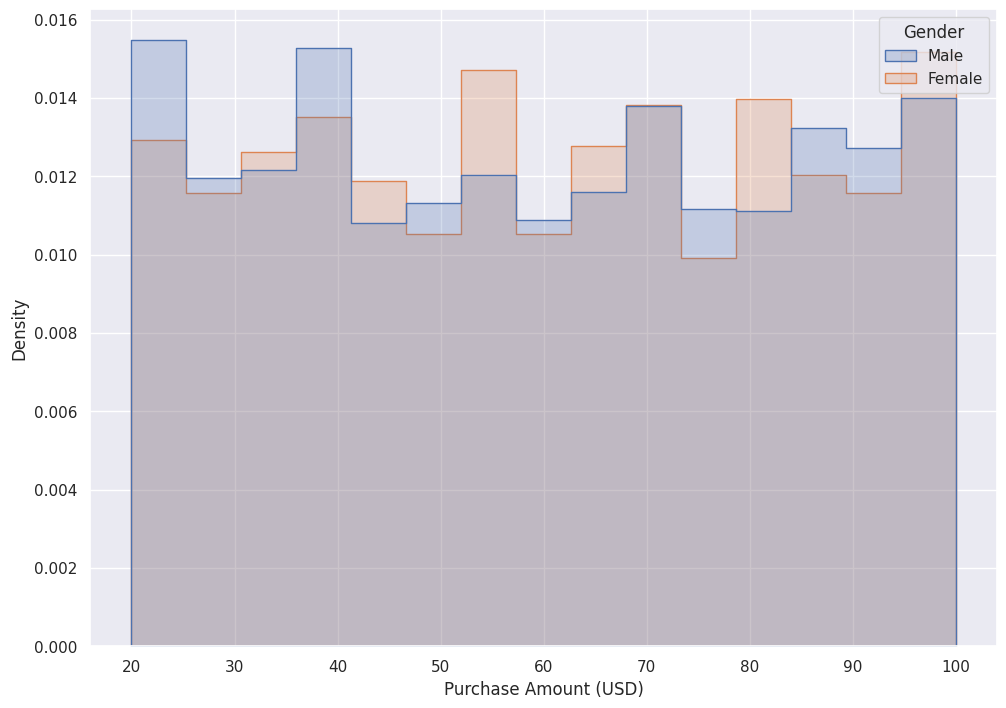

In [185]:
# Какой возраст покупает самые дорогие товары
# Для этого построим гистограмму для столбца Purchase Amount (USD) для мужчин и женщин, нормализуя их по всей выборке
sns.histplot(df, x="Purchase Amount (USD)", hue="Gender", element="step",
    stat="density", common_norm=False)

Видим, что самые дорогие вещи больше покупают женщины, чем мужчины.

<Axes: xlabel='Season', ylabel='Count'>

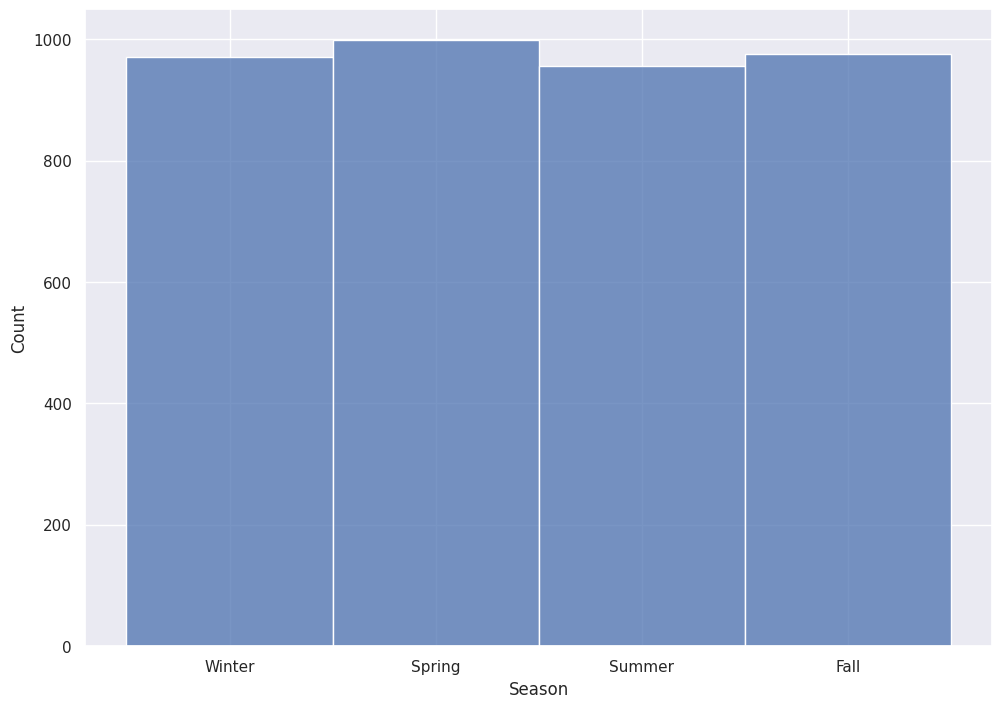

In [189]:
# MAU
sns.histplot(df, x="Season")

<Axes: xlabel='Symbol', ylabel='Count'>

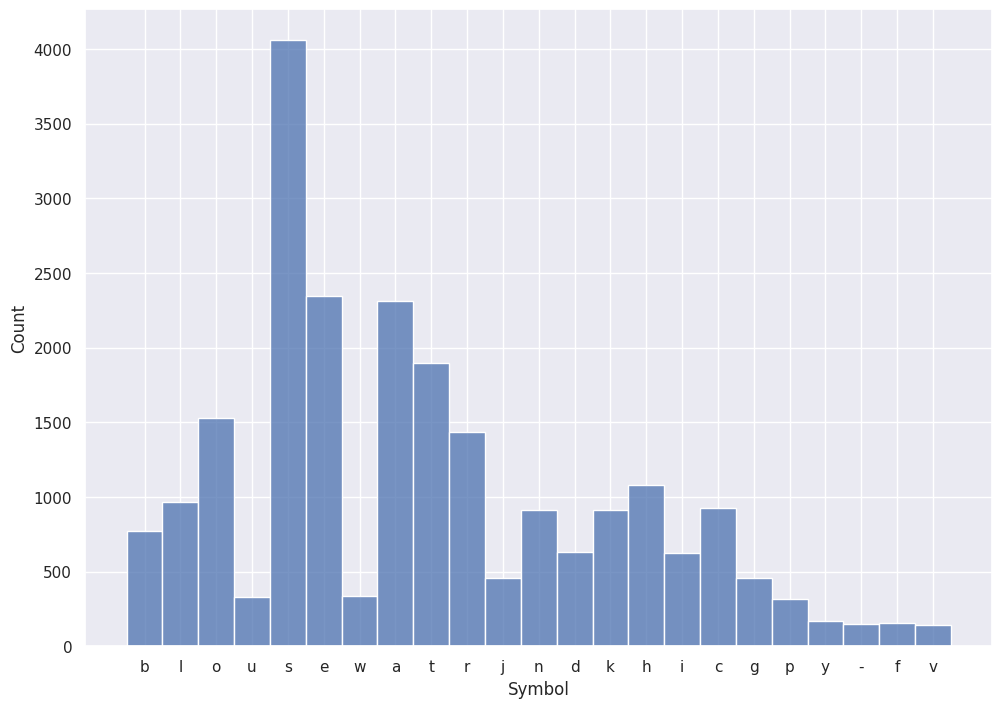

In [199]:
# Самая популярная буква
letter_count = {}
for name in df['Item Purchased']:
    name = name.lower()
    for letter in name:
        letter_count[letter] = letter_count.get(letter, 0) + 1
d = pd.DataFrame({'Symbol': list(letter_count.keys()), 'Value': list(letter_count.values())})

# Create the histogram plot using Seaborn
sns.histplot(data=d, x='Symbol', weights='Value', discrete=True)


Самая популярная буква - "s".

In [274]:
# Построим контингентную таблицу, чтобы увидеть распределение цвета одежды относительно сезона:
contingency_table = pd.crosstab(df['Color'], df['Season'])
print(contingency_table)

Season     Fall  Spring  Summer  Winter
Color                                  
Brown        35      33      33      40
Gray         44      48      40      27
Black        42      43      42      40
Violet       44      45      40      37
Pink         35      44      29      45
Olive        47      52      35      43
Purple       37      43      38      33
Maroon       40      39      35      44
Indigo       37      37      32      41
Blue         32      39      46      35
Red          42      31      36      39
Charcoal     32      42      36      43
Cyan         43      42      42      39
Teal         40      46      49      37
Beige        34      39      37      37
Green        37      38      44      50
Turquoise    27      41      36      41
Silver       39      37      59      38
Lavender     38      32      39      38
Magenta      50      37      35      30
Peach        42      38      24      45
Gold         36      38      30      34
Orange       45      39      37      33


In [284]:
# хи-квадрат тест, чтобы определить, есть ли статистически значимая связь между цветом одежды и сезоном
from scipy.stats import chi2_contingency
chi2, p_val, _, _ = chi2_contingency(contingency_table)
print("Хи-квадрат статистика:", chi2)
print("p-значение:", p_val)

Хи-квадрат статистика: 64.6506366841786
p-значение: 0.718551112120402


p-value очень большой, поэтому нельзя сделать вывод о наличии статистически значимой зависимости seasons и colors

In [304]:
bs = {'White':100,
'Pink': 100,
'Yellow': 100,
'Orange': 100,
'Gold':90,
'Beige':90,
'Peach': 90,
'Magenta': 90,
'Lavender': 90,
'Silver':70,
'Turquoise':70,
'Green': 50,
'Cyan':50,
'Charcoal':10,
'Red': 90,
'Indigo': 30,
'Maroon':50,
'Purple':80,
'Olive':40,
'Violet':70,
'Blue':75,
'Gray': 40,
'Brown': 30,
'Black': 0,
}
colors = list(bs.keys())

sorted_colors = sorted(colors, key=lambda color: bs[color])
sorted_colors

['Black',
 'Charcoal',
 'Indigo',
 'Brown',
 'Olive',
 'Gray',
 'Green',
 'Cyan',
 'Maroon',
 'Silver',
 'Turquoise',
 'Violet',
 'Blue',
 'Purple',
 'Gold',
 'Beige',
 'Peach',
 'Magenta',
 'Lavender',
 'Red',
 'White',
 'Pink',
 'Yellow',
 'Orange']

/tmp/ipykernel_3666/177840492.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.countplot(data=df, x='Season', hue='Color', color='white')


<Axes: xlabel='Season', ylabel='count'>

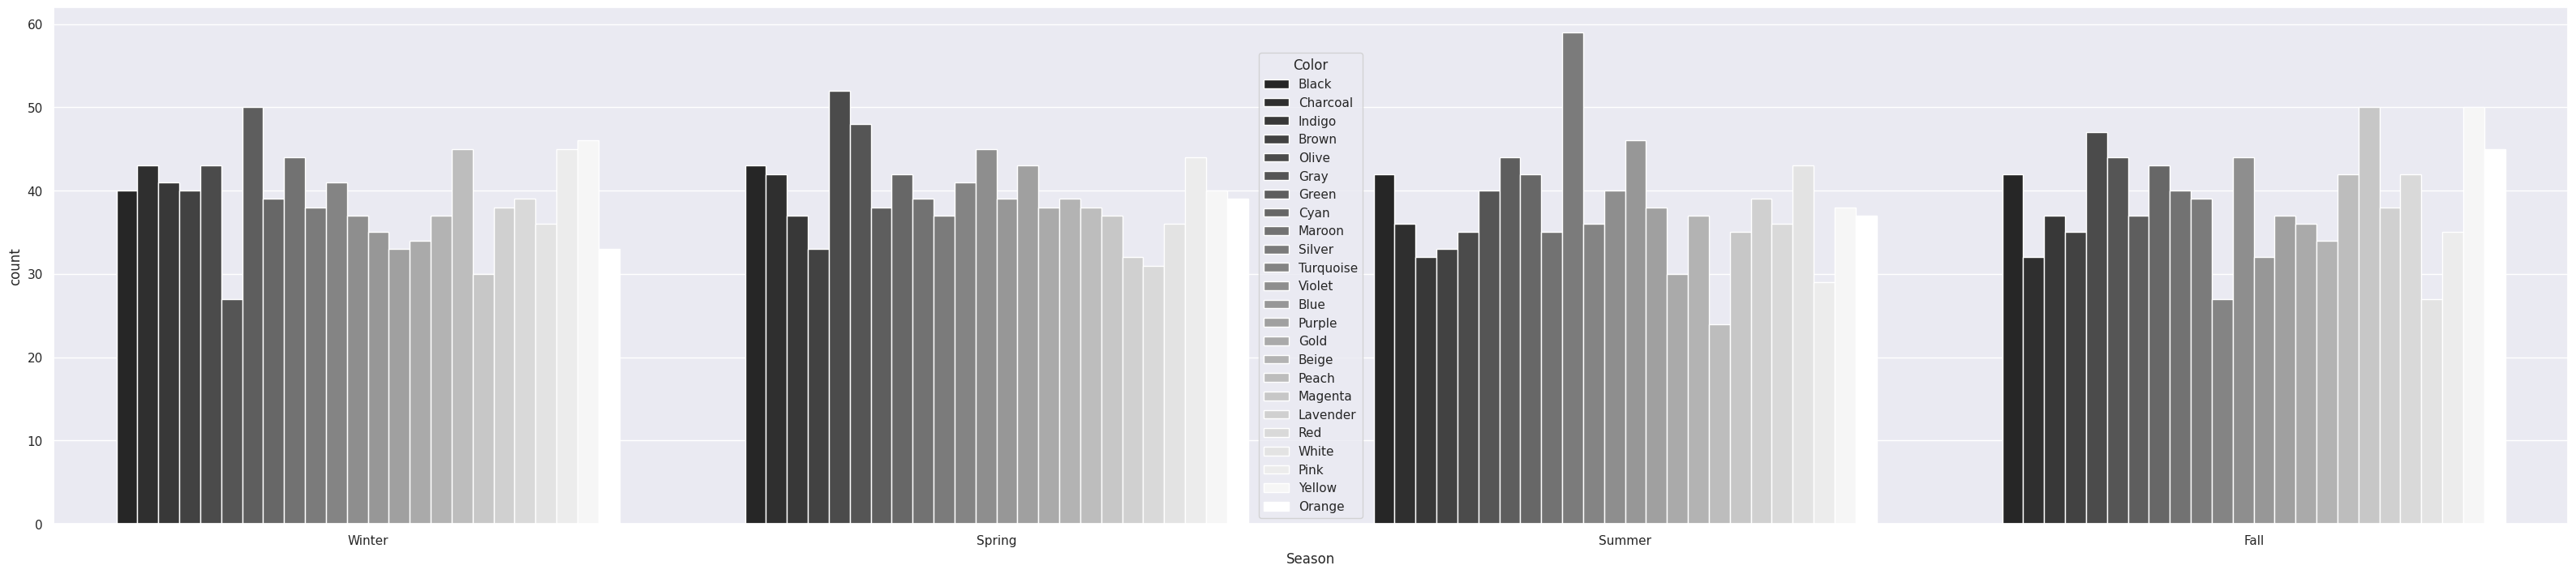

In [306]:
# Построим распределение цветов для каждого сезона
sns.set(rc={'figure.figsize':(40,8.27)})
df['Color'] = pd.Categorical(df['Color'], sorted_colors)
sns.countplot(data=df, x='Season', hue='Color', color='white')

Что-то дельное про зависимость цвета от сезона трудно отсюда выяснить. Любобытный факт, что летом люди покупают больше серебристыхз футболок, чем в другие сезоны.

<h1>Задание 3</h1> 

У нас есть данные о потреблении алкоголя о потреблнеии Алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Давайте представим эти данные в виде df, где же люди пьют больше вина, пива и других спиртных напитков.

In [204]:
alco_df = pd.read_csv('drinks.csv')
alco_df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [209]:
alco_df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [212]:
for drink in alco_df.columns[1:]:
    print(f"{drink}: {alco_df.loc[alco_df[drink].idxmax()]['country']}")

beer_servings: Namibia
spirit_servings: Grenada
wine_servings: France
total_litres_of_pure_alcohol: Belarus


<h1>Задание 4</h1> 

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде df и определим:

- число проклятий, летальных исходов и их отношение по фильмам 

- частота употребления конкретных прокрятий 

- распределение времени между проклятиями 

In [233]:
trnt_df = pd.read_csv('tarantino.csv')
print(trnt_df.info())
trnt_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB
None


,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [228]:
# число проклятий, летальных исходов и их отношение по фильмам
for movie in trnt_df['movie'].unique():
    word_count, death_count = trnt_df.loc[trnt_df['movie'] == movie]['type'].value_counts()
    print(f"{movie}: words {word_count}, death {death_count}, ratio {word_count/death_count}")

Reservoir Dogs: words 421, death 10, ratio 42.1
Pulp Fiction: words 469, death 7, ratio 67.0
Kill Bill: Vol. 1: words 63, death 57, ratio 1.105263157894737
Kill Bill: Vol. 2: words 69, death 11, ratio 6.2727272727272725
Inglorious Basterds: words 58, death 48, ratio 1.2083333333333333
Django Unchained: words 262, death 47, ratio 5.574468085106383
Jackie Brown: words 368, death 4, ratio 92.0


In [230]:
# частота употребления конкретных прокрятий
trnt_df['word'].value_counts()

word
fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
bullshit          15
motherfuckers     15
dick              14
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitting           1
shitless           1
bastards

<Axes: xlabel='minutes_in', ylabel='Count'>

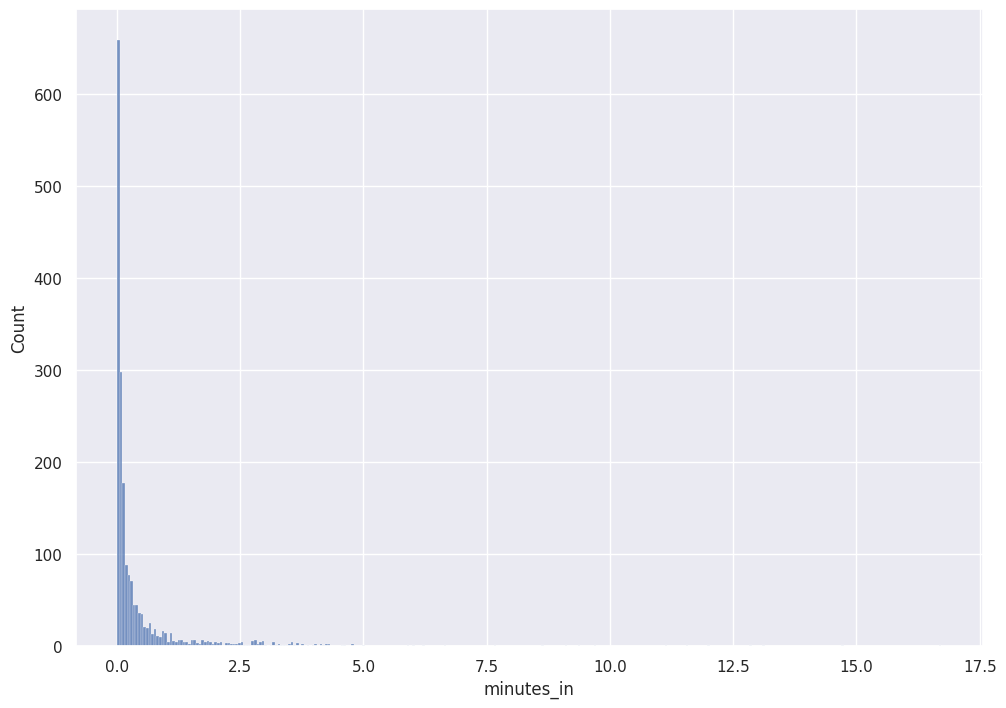

In [237]:
#распределение времени между проклятиями
diffs = pd.DataFrame.diff(trnt_df['minutes_in'])
diffs = diffs[diffs >= 0]
sns.histplot(diffs)